In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.ticker as plticker
import math
from sklearn.model_selection import train_test_split
#classifer is more appropriate for binary outout (RandomForestRegressor gives a range)
#one hot encoding will convert column strings to binaries
#make dummies pandas is a function that will do one hot encoding
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [2]:
df_dec = pd.read_csv('COVID_Cases_Restricted_Detailed_12042020.csv')
df_dec.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years


In [3]:
print(df_dec['death_yn'].value_counts())

No         3690813
Missing    3486923
Unknown    1043766
Yes         183577
Name: death_yn, dtype: int64


In [6]:
death_df['sex'].value_counts()

Female     2015378
Male       1806169
Unknown      10100
Missing       3784
Other            5
Name: sex, dtype: int64

In [5]:
death_df = df_dec.loc[(df_dec['death_yn'] == 'Yes') | (df_dec['death_yn'] == 'No')]
death_df.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,...,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
49,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years
55,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
56,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Yes,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
58,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years


In [7]:
#one hot encoding
#pd dummies takes forever
death_sex_dummy = pd.get_dummies(death_df[['death_yn','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn']],dummy_na=True)

with pd.option_context('display.max_rows', 20, 'display.max_columns', None): 
    print(death_sex_dummy.head())

    death_yn_No  death_yn_Yes  death_yn_nan  sex_Female  sex_Male  \
7             1             0             0           0         0   
49            0             1             0           1         0   
55            1             0             0           1         0   
56            1             0             0           1         0   
58            1             0             0           1         0   

    sex_Missing  sex_Other  sex_Unknown  sex_nan  hosp_yn_Missing  hosp_yn_No  \
7             0          0            0        1                0           0   
49            0          0            0        0                1           0   
55            0          0            0        0                0           1   
56            0          0            0        0                0           1   
58            0          0            0        0                0           1   

    hosp_yn_Unknown  hosp_yn_Yes  hosp_yn_nan  icu_yn_Missing  icu_yn_No  \
7                 0   

In [8]:
deaths_array = death_sex_dummy['death_yn_Yes']
other_data = death_sex_dummy.iloc[:,3:]

In [9]:
other_data.head()

,sex_Female,sex_Male,sex_Missing,sex_Other,sex_Unknown,sex_nan,hosp_yn_Missing,hosp_yn_No,hosp_yn_Unknown,hosp_yn_Yes,...,diarrhea_yn_Missing,diarrhea_yn_No,diarrhea_yn_Unknown,diarrhea_yn_Yes,diarrhea_yn_nan,medcond_yn_Missing,medcond_yn_No,medcond_yn_Unknown,medcond_yn_Yes,medcond_yn_nan
7,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
49,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
55,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
56,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
58,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(other_data, deaths_array, test_size = 0.2, random_state = 42
)

In [11]:
shot_in_the_dark = RandomForestClassifier(max_depth=2, random_state=0)
shot_in_the_dark.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [12]:
result = shot_in_the_dark.predict(X_test)

In [16]:
#model = RadiusNeighborsClassifier(radius=35.0, p=4, outlier_label="most_frequent").fit(X_train, y_train)
#_ = classification_report(shot_in_the_dark, X_test, y_test, classes=BLBLS, support=True, is_fitted=True)
shot_in_the_dark.score(X_test, y_test)

0.9525499497985489

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


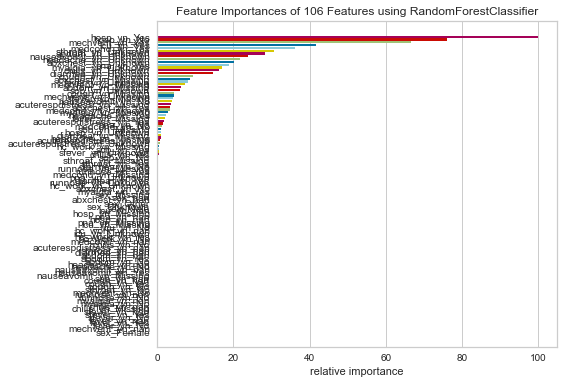

<AxesSubplot:title={'center':'Feature Importances of 106 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [19]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(shot_in_the_dark)
viz.fit(X_train, y_train)
viz.show()
#shot_in_the_dark.feature_importances_

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


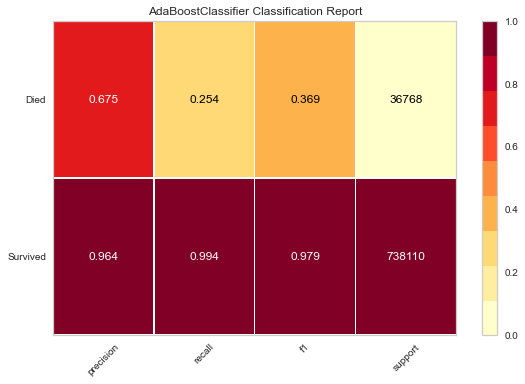

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.classifier import classification_report

classes = ["Survived","Died"]
aDamodel = AdaBoostClassifier(n_estimators=25).fit(X_train, y_train)
_ = classification_report(aDamodel, X_test, y_test, classes=classes, support=True, is_fitted=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


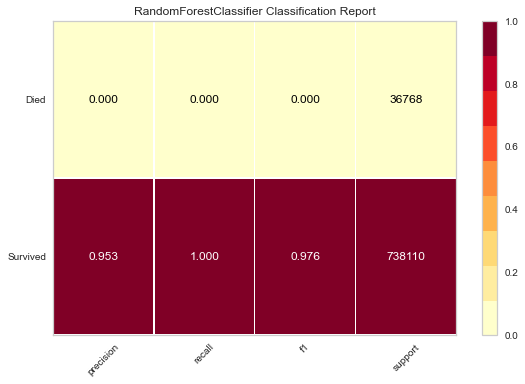

In [27]:
classes = ["Survived","Died"]
_ = classification_report(shot_in_the_dark, X_test, y_test, classes=classes, support=True, is_fitted=True)